# **1. 데이터 로드 및 전처리 그리고 Feature Engineering**

In [130]:
#파일 불러오기

import pandas as pd
import numpy as np
import re

from google.colab import drive
drive.mount('/content/drive')

filename = '/content/drive/My Drive/vgames2.csv'
df = pd.read_csv(filename)

#데이터 종류, 결측치 확인 및 제거

print(df['Name'].isna().sum())
print(df['Platform'].isna().sum())
print(df['Year'].isna().sum())
print(df['Genre'].isna().sum())
print(df['Publisher'].isna().sum())

df = df.dropna()

#데이터 타입 확인및 변환

print(df.dtypes)

def toInt(string):
    return int(string)

df['Year'] = df['Year'].apply(toInt)
df['Year'] = df['Year'].apply(lambda x: 1900 + x if x <= 100 else x)

df['NA_Sales'] = df.apply(lambda x: x['NA_Sales'].replace("K", "").replace("M", "") if x['NA_Sales'] else '', axis=1)
df['EU_Sales'] = df.apply(lambda x: x['EU_Sales'].replace("K", "").replace("M", "") if x['EU_Sales'] else '', axis=1)
df['JP_Sales'] = df.apply(lambda x: x['JP_Sales'].replace("K", "").replace("M", "") if x['JP_Sales'] else '', axis=1)
df['Other_Sales'] = df.apply(lambda x: x['Other_Sales'].replace("K", "").replace("M", "") if x['Other_Sales'] else '', axis=1)

def toFloat(string): 
    return float(string)

df['NA_Sales'] = df['NA_Sales'].apply(toFloat)
df['EU_Sales'] = df['EU_Sales'].apply(toFloat)
df['JP_Sales'] = df['JP_Sales'].apply(toFloat)
df['Other_Sales'] = df['Other_Sales'].apply(toFloat)

def toMillion(string):
    return np.where(string < 1, string, string*0.001)

df['NA_Sales'] = df['NA_Sales'].apply(toMillion)
df['EU_Sales'] = df['EU_Sales'].apply(toMillion)
df['JP_Sales'] = df['JP_Sales'].apply(toMillion)
df['Other_Sales'] = df['Other_Sales'].apply(toMillion)

#Feature 추가하기

df['Global_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
df['NA_Percentage'] = df['NA_Sales'] / df['Global_Sales']
df['EU_Percentage'] = df['EU_Sales'] / df['Global_Sales']
df['JP_Percentage'] = df['JP_Sales'] / df['Global_Sales']
df['Other_Percentage'] = df['Other_Sales'] / df['Global_Sales']
df['Global_Rank'] = df['Global_Sales'].rank(ascending = False)
df['Global_Rank'] = df['Global_Rank'].apply(toInt)
df = df.sort_values(by=['Global_Sales'], ascending = False)
df = df.reset_index()

df


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
0
0
271
50
58
Unnamed: 0       int64
Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object


,index,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_Percentage,EU_Percentage,JP_Percentage,Other_Percentage,Global_Rank
0,1964,1965,The Legend of Zelda: Ocarina of Time,N64,1998,Action,Nintendo,4.10000,0.00189,0.00145,0.16,4.26334,0.961687,0.000443,0.000340,0.037529,1
1,9829,9830,Super Mario Bros. 3,GBA,2003,Platform,Nintendo,2.93000,0.00125,0.83000,0.20,3.96125,0.739666,0.000316,0.209530,0.050489,2
2,3589,3590,Final Fantasy IX,PS,2000,Role-Playing,SquareSoft,0.00162,0.77000,2.78000,0.14,3.69162,0.000439,0.208581,0.753057,0.037924,3
3,13935,13936,Crash Team Racing,PS,1999,Racing,Sony Computer Entertainment,2.57000,0.00157,0.44000,0.21,3.22157,0.797748,0.000487,0.136579,0.065186,4
4,1280,1281,Resident Evil 6,PS3,2012,Shooter,Capcom,0.88000,0.97000,0.88000,0.42,3.15000,0.279365,0.307937,0.279365,0.133333,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16236,5744,5745,Tag Team Match M.U.S.C.L.E.,NES,1985,Fighting,Namco Bandai Games,0.00000,0.00000,0.00105,0.00,0.00105,0.000000,0.000000,1.000000,0.000000,16237
16237,4365,4366,Adventure Island,NES,1986,Platform,Hudson Soft,0.00000,0.00000,0.00105,0.00,0.00105,0.000000,0.000000,1.000000,0.000000,16237
16238,3359,3360,Oshare Majo Love and Berry: DS Collection,DS,2006,Misc,Sega,0.00000,0.00000,0.00101,0.00,0.00101,0.000000,0.000000,1.000000,0.000000,16239
16239,3924,3925,Jissen Pachi-Slot Hisshouhou: Hokuto no Ken,PS2,2004,Misc,Sammy Corporation,0.00000,0.00000,0.00100,0.00,0.00100,0.000000,0.000000,1.000000,0.000000,16240


# **2.시각화와 테이블을 통한 EDA**




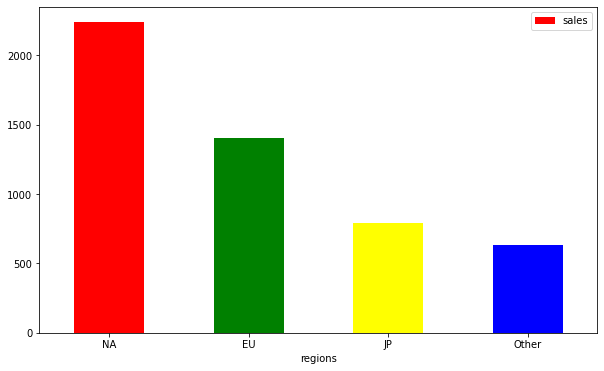

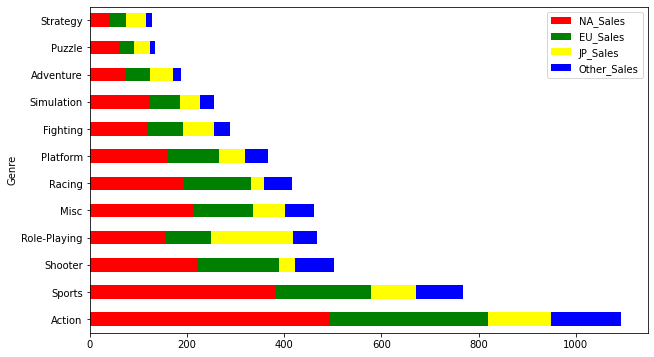

In [26]:
import numpy as np
import seaborn as sns
from matplotlib import rcParams
import matplotlib.pyplot as plt

# 지역별 점유율

sales = pd.DataFrame({'regions':['NA', 'EU', 'JP', 'Other'], 'sales':[df['NA_Sales'].sum(), df['EU_Sales'].sum(), df['JP_Sales'].sum(), df['Other_Sales'].sum()]})
rcParams['figure.figsize'] = 10,6
sales_bar = sales.plot.bar(x='regions', y='sales', rot=0, color=['red', 'green', 'yellow', 'blue'])

# 지역별 선호장르

genre = df.groupby('Genre').sum()
genre = genre.sort_values(by=['Global_Sales'], ascending = False)
genre = genre[["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]]
genre.plot(kind='barh', stacked=True, color=['red', 'green', 'yellow','blue']) 


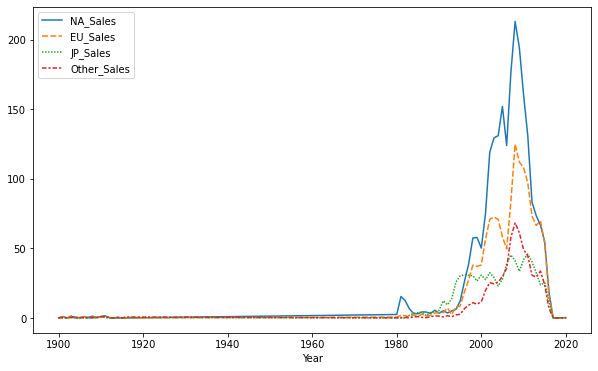

In [107]:

# 연도별 판매량 트랜드

year_sales = df.groupby('Year').sum()
year_sales = year_sales.sort_values(by=['Global_Sales'], ascending = False)
year_sales = year_sales['NA_Sales'], year_sales['EU_Sales'], year_sales['JP_Sales'], year_sales['Other_Sales']
year_sales = pd.DataFrame(data=year_sales).T
sns.lineplot(data=year_sales)

year_sales

# 연도별 선호장르

year_genre_sales = df.groupby(['Year', 'Genre']).sum()
year_genre_sales = year_genre_sales.sort_values(by=['Global_Sales'], ascending = False)
year_genre_sales = year_genre_sales['NA_Sales']
year_genre_sales = pd.DataFrame(data=year_genre_sales).T
year_genre_sales = year_genre_sales.T


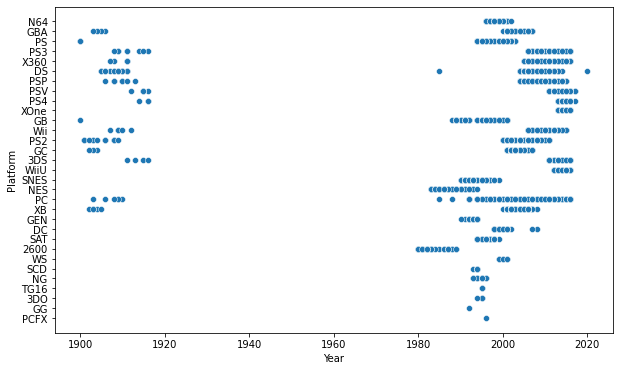

In [33]:
# 연도별 선호 플랫폼

year_platform = df['Year'], df['Platform']
year_platform = pd.DataFrame(data=year_platform).T
sns.scatterplot(data=year_platform, x="Year", y="Platform")

Data: 
 Name          LEGO Marvel Super Heroes  ...  Jissen Pachi-Slot Hisshouhou: Hokuto no Ken
NA_Sales                       3.17124  ...                                        0.000
EU_Sales                       4.14000  ...                                        0.000
JP_Sales                       0.08000  ...                                        0.001
Other_Sales                    1.23000  ...                                        0.000
Global_Sales                   8.62124  ...                                        0.001

[5 rows x 11295 columns]

 Standardized Data: 
 [[-0.09391139 -0.03846501  0.06311892 ... -0.81649658 -0.81649658
  -0.81649658]
 [ 0.23422433  0.02903741 -0.21599604 ... -0.81649658 -0.81649658
  -0.81649658]
 [-1.14096769 -1.17973177 -1.1493419  ...  1.22474487  1.22474487
   1.22474487]
 [-0.75144285 -0.60934312 -0.52797652 ... -0.81649658 -0.81649658
  -0.81649658]
 [ 1.7520976   1.79850249  1.83019554 ...  1.22474487  1.22474487
   1.22474487]]

 E

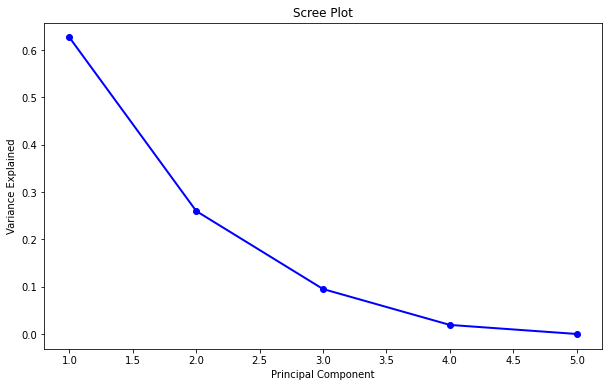

Name,LEGO Marvel Super Heroes,The Sims 3,Need for Speed: Most Wanted,LEGO Star Wars III: The Clone Wars,Diablo III,LEGO Batman 2: DC Super Heroes,FIFA 14,Star Wars: The Force Unleashed,Watch Dogs,Minecraft,Toy Story 3: The Video Game,WWE SmackDown vs Raw 2008,The Simpsons Game,FIFA Soccer 08,Need For Speed: Undercover,Need for Speed: ProStreet,Cars,FIFA Soccer 11,LEGO Pirates of the Caribbean: The Video Game,FIFA 15,Call of Duty: Ghosts,LEGO Star Wars II: The Original Trilogy,Far Cry 4,The LEGO Movie Videogame,Harry Potter and the Chamber of Secrets,FIFA Soccer 10,LEGO Indiana Jones 2: The Adventure Continues,WWE SmackDown vs. Raw 2010,The Legend of Zelda: Ocarina of Time,Need for Speed Carbon,Tomb Raider (2013),LEGO Harry Potter: Years 1-4,Need for Speed Rivals,Monopoly,LEGO Jurassic World,Skylanders SWAP Force,Guitar Hero 5,Wall-E,WWE SmackDown vs. Raw 2009,LEGO Indiana Jones: The Original Adventures,...,GunParade Orchestra: Ao no Shou,LMA Manager 2007,Monster Hunter Freedom 3,World of Warcraft: The Burning Crusade,Friend Collection,Monster Hunter 4,Dragon Quest VI: Maboroshi no Daichi,Yokai Watch 2 Shinuchi,Super Mario Bros.: The Lost Levels,Yokai Watch Busters,The Sims: Hot Date,Kanshuu Nippon Joushikiryoku Kentei Kyoukai: Imasara Hito ni wa Kikenai Otona no Joushikiryoku Training DS,The Sims: Superstar,Command & Conquer: Tiberian Sun,F1 Race,Puzzle & Dragons,Ninja Hattori Kun: Ninja wa Shuugyou Degogiru no Maki,Dragon Ball Z,4 Nin uchi Mahjong,Pocket Monsters Stadium,Dragon Quest III: Soshite Densetsu e...,Yakuman,Yokai Watch 3,Dragon Ball: Daimaou Fukkatsu,Gegege no Kitarou 2: Youkai Gundan no Chousen,TwinBee,Dragon Ball Z: La Legende Saien,Ganbare Goemon! Karakuri Douchuu,Romancing SaGa 2,Doraemon,Derby Stallion III,Dragon Quest I & II,Worldwide Soccer Manager 2008,Famicom Jump: Eiyuu Retsuden,Yu-Gi-Oh! Duel Monsters II: Dark Duel Stories,The Final Fantasy Legend,Tag Team Match M.U.S.C.L.E.,Adventure Island,Oshare Majo Love and Berry: DS Collection,Jissen Pachi-Slot Hisshouhou: Hokuto no Ken
NA_Sales,3.17124,3.01127,3.26303,2.87108,2.44243,3.40,2.84000,1.43389,2.40140,0.47036,2.76,3.40000,2.53000,1.96000,2.48000,2.31104,4.30101,1.94000,2.45,3.20000,2.25268,3.23185,1.72112,2.30,3.66000,1.94000,2.89,2.68,4.10203,2.33122,2.27000,1.65236,1.92,2.00267,2.16,2.21132,2.40,1.88,2.78,1.46382,...,0.00,0.00,0.00000,0.00257,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00181,0.00000,0.00167,0.00155,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000,0.0000,0.00000,0.00000,0.00000,0.000
EU_Sales,4.14000,3.18642,2.55330,2.81000,2.39215,2.31,2.04910,2.97000,2.18186,1.64721,2.56,1.86000,2.61000,2.90107,1.53102,2.56000,0.97000,2.32569,2.52,1.55086,1.27778,1.55000,2.33212,2.28,0.87231,1.98425,1.72,1.42,0.00316,2.14000,1.72131,2.45105,2.39,2.49000,2.16,2.08000,1.56,1.93,1.11,1.57103,...,0.00,0.01,0.00000,0.00152,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000,0.0000,0.00000,0.00000,0.00000,0.00000,0.00112,0.0000,0.0000,0.0000,0.00000,0.00000,0.00000,0.000
JP_Sales,0.08000,0.05000,0.18000,0.00000,0.21000,0.00,0.20000,0.01000,0.22000,1.15000,0.02,0.02000,0.00000,0.04000,0.12000,0.10000,0.00000,0.09000,0.00,0.13000,0.48000,0.01000,0.19000,0.11,0.11000,0.07000,0.00,0.02,0.62145,0.12000,0.15000,0.00000,0.09,0.00000,0.06,0.00000,0.00,0.00,0.01,0.00000,...,0.01,0.00,0.00487,0.00000,0.00367,0.00344,0.00319,0.00268,0.00265,0.00228,0.00000,0.00171,0.00000,0.00000,0.00152,0.00151,0.0015,0.00145,0.00145,0.00137,0.00136,0.00128,0.00127,0.00125,0.00125,0.0012,0.0012,0.0012,0.00117,0.00115,0.00115,0.00115,0.00000,0.0011,0.0011,0.0011,0.00105,0.00105,0.00101,0.001
Other_Sales,1.23000,1.53000,1.76000,0.82000,1.44000,0.65,1.25173,1.91000,1.44000,2.93000,0.73,0.74141,0.85113,1.07246,1.79000,0.93168,0.60000,1.38113,0

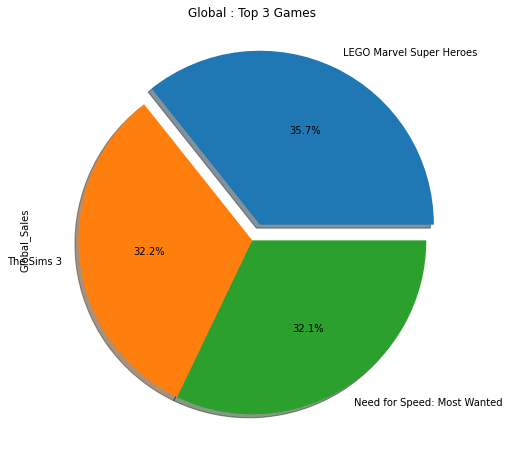

In [122]:
# 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA

popgames = df.groupby('Name').sum()
popgames = popgames.sort_values(by=['Global_Sales'], ascending = False)
popgames = popgames[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]]
popgames = popgames.T

print("Data: \n", popgames)

scaler = StandardScaler()
Z = scaler.fit_transform(popgames)
print("\n Standardized Data: \n", Z)

pca = PCA(5)

pca.fit(Z)

print("\n Eigenvectors: \n", pca.components_)
print("\n Eigenvalues: \n",pca.explained_variance_)

B = pca.transform(Z)
print("\n Projected Data: \n", B)
PD = pd.DataFrame(data=B)

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show() #PCA 시행 후 Scree plot을 그린 결과, 판매량 기준 상위 3개의 게임으로 약 90%의 데이터가 설명이 됨.

popgames_Global = pd.DataFrame(popgames[['LEGO Marvel Super Heroes', 'The Sims 3', 'Need for Speed: Most Wanted']])
popgames_Global = popgames_Global.T['Global_Sales']
Global_popgames = popgames_Global.plot.pie(y='Global_Sales', figsize=(15, 8), title="Global : Top 3 Games", legend=None, \
                   autopct='%1.1f%%', explode=(0.1, 0, 0), \
                   shadow=True, startangle=0)

popgames.head()


,NA_Sales
The Legend of Zelda: Ocarina of Time,4.10
"Super Mario Bros, 3",2.93
Crash Team Racing,2.57


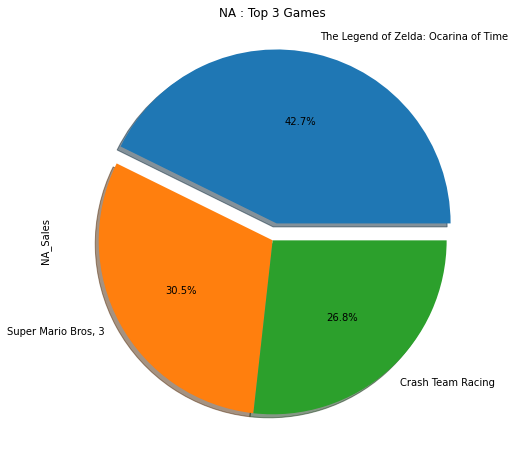

In [128]:
# 북미에서 가장 인기있는 게임

popgames_NA = df.nlargest(3, 'NA_Sales')
popgames_NA

popgames_NA = pd.DataFrame({'NA_Sales': [4.10, 2.93 , 2.57]},
                  index=['The Legend of Zelda: Ocarina of Time', 'Super Mario Bros, 3', 'Crash Team Racing'])

NA_popgames = popgames_NA.plot.pie(y='NA_Sales', figsize=(15, 8), title="NA : Top 3 Games", legend=None, \
                   autopct='%1.1f%%', explode=(0.1, 0, 0), \
                   shadow=True, startangle=0)

popgames_NA

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,
PS2,297.43138,207.37478,107.02710,137.88993,749.72319
PS3,218.20996,189.13073,75.61295,107.85265,590.80629
X360,251.96216,170.75725,12.29000,74.48015,509.48956
DS,254.65341,89.51464,85.75930,48.08217,478.00952
Wii,234.90046,113.72720,32.38344,52.63587,433.64697


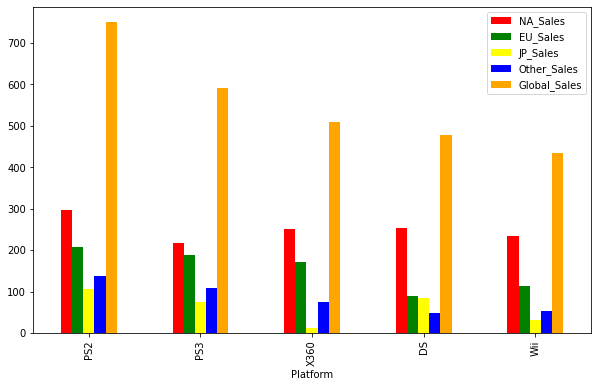

In [129]:
#플랫폼별 판매량

platform = df.groupby(['Platform']).sum()
platform = platform.sort_values(by=['Global_Sales'], ascending = False)
platform = platform[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]
platform = platform.nlargest(5, 'Global_Sales')
platform

platform.plot(kind='bar', color=['red', 'green', 'yellow', 'blue', 'orange'])
platform.head()


# 결론 : 유저들은 한가지 플랫폼 보다는 다양한 플랫폼에서 게임을 즐기며, 특히 플랫폼 점유율이 높은 (PS2, PS3, DS, X350, Wii)에서 구동이 되는 게임을 출시해야 한다.

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,,,,,
Electronic Arts,347.41272,214.27199,10.81317,104.36285,676.86073
Nintendo,154.07472,106.24440,158.50921,55.73797,474.56630
Activision,213.46185,107.87540,6.54000,53.35122,381.22847
Ubisoft,159.56279,106.24680,7.33000,47.91221,321.05180
Sony Computer Entertainment,111.66219,86.77007,44.00974,62.78665,305.22865


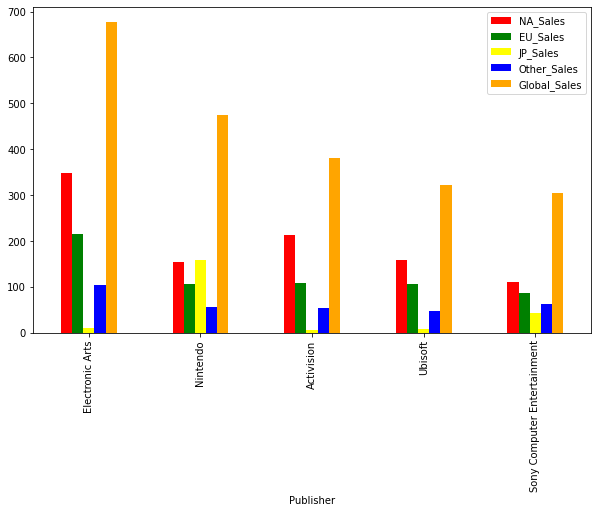

In [31]:
#Publisher별 판매량

publisher = df.groupby(['Publisher']).sum()
publisher = publisher.sort_values(by=['Global_Sales'], ascending = False)
publisher_sales = publisher[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]
publisher_sales = publisher_sales.nlargest(5, 'Global_Sales')

publisher_sales.plot(kind='bar', color=['red', 'green', 'yellow','blue', 'orange'])
publisher_sales.head()

# 결론 : 글로벌 게임시장과 미국 게임시장 모두 점유율이 가장 높은 Publisher은 Electronic Arts사이다.

Data: 
 Genre                         Action  Adventure  ...  Sports  Strategy
Publisher                                        ...                  
10TACLE Studios                    0          1  ...       0         1
1C Company                         0          0  ...       0         1
20th Century Fox Video Games       4          0  ...       0         0
2D Boy                             0          0  ...       0         0
3DO                               17          3  ...       6         1
...                              ...        ...  ...     ...       ...
id Software                        0          0  ...       0         0
imageepoch Inc.                    0          1  ...       0         0
inXile Entertainment               0          0  ...       0         0
mixi, Inc                          1          0  ...       0         0
responDESIGN                       0          0  ...       2         0

[575 rows x 12 columns]

 Standardized Data: 
 [[-0.21508267 -0.1625

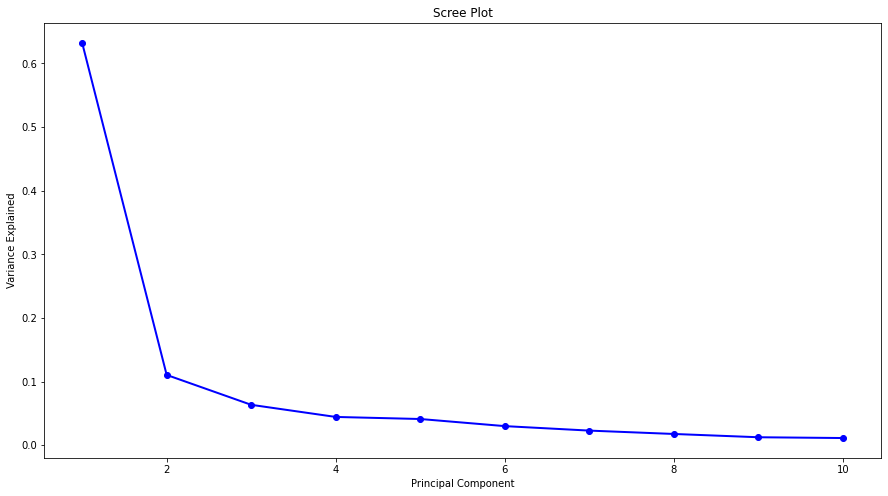

Genre
Action          3240
Adventure       1268
Fighting         835
Misc            1681
Platform         873
Puzzle           566
Racing          1219
Role-Playing    1465
Shooter         1280
Simulation       846
Sports          2299
Strategy         669
dtype: int64


Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Publisher,,,,,,,,,,,,
10TACLE Studios,0,1,0,0,0,1,0,0,0,0,0,1
1C Company,0,0,0,0,0,0,1,1,0,0,0,1
20th Century Fox Video Games,4,0,0,0,0,0,0,0,1,0,0,0
2D Boy,0,0,0,0,0,1,0,0,0,0,0,0
3DO,17,3,1,0,1,1,0,1,5,0,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...
id Software,0,0,0,0,0,0,0,0,1,0,0,0
imageepoch Inc.,0,1,0,0,0,0,0,1,0,0,0,0
inXile Entertainment,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
#Publisher별 주력 Genre

publisher_genre = pd.crosstab(df['Publisher'], df['Genre'])
publisher_genre

print("Data: \n", publisher_genre)

scaler = StandardScaler()
Z = scaler.fit_transform(publisher_genre)
print("\n Standardized Data: \n", Z)

pca = PCA(10)

pca.fit(Z)

print("\n Eigenvectors: \n", pca.components_)
print("\n Eigenvalues: \n",pca.explained_variance_)

B = pca.transform(Z)
print("\n Projected Data: \n", B)
PD = pd.DataFrame(data=B)

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show() #PCA 시행 후 Scree plot을 그린 결과, 

print(publisher_genre.sum())
publisher_genre

# **3. 가설검정과 착안점 찾기**

In [7]:

# 가설검정

from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway

# 1. 북미 판매량과 플랫폼의 상관관계

obs1 = pd.crosstab(df['Platform'],df['NA_Sales'])
obs1
print(chi2_contingency(obs1, correction = False)) 

#H0 : 플랫폼과 북미 판매량 사이에는 상관관계가 없을 것이다
#H1 : 플랫폼과 북미 판매량 사이에는 유의미한 상관관계가 있을 것이다.
#결론 : P-value 0.0으로 H0 기각. 즉 플랫폼과 북미 판매량 사이에는 유의미한 상관관계가 있다!

# 2. 장르와 북미 판매량의 상관관계

obs2 = pd.crosstab(df['Genre'],df['NA_Sales'])
obs2
print(chi2_contingency(obs2, correction = False)) 

#H0 : 장르와 북미 판매량 사이에는 상관관계가 없을 것이다.
#H1 : 장르와 북미 판매량 사이에는 유의미한 상관관계가 있을 것이다. 
#결론 : P-value 4.86으로 H0 채택. 즉 장르와 북미 판매량 사이에는 상관관계가 없다. 

# 3. 북미 판매량과 퍼블리셔의 상관관계

obs4 =  pd.crosstab(df['NA_Sales'], df['Publisher'])
obs4
print(chi2_contingency(obs4, correction = False)) 

#H0 : 퍼블리셔와 북미 판매량 사이에는 상관관계가 없을 것이다.
#H1 : 퍼블리셔와 북미 판매량 사이에는 유의미한 상관관계가 있을 것이다. 
#결론 : P-value 1.0으로 H0 채택. 즉 펴블리셔와 북미 판매량 사이에는 상관관계가 없다.

# 4. 퍼블리셔와 장르간의 상관관계

obs3 = pd.crosstab(df['Genre'], df['Publisher'])
obs3
print(chi2_contingency(obs3, correction = False)) 

#H0 : 퍼블리셔와 장르간에는 상관관계가 없을 것이다.
#H1 : 퍼블리셔와 장르간에는 유의미한 상관관계가 있을 것이다. 
#결론 : P-value 0.0으로 H0 기각. 즉 펴블리셔와 장르간에는 유의미한 상관관계가 있다!

# 5 연도별 선호 플랫폼

obs4 = pd.crosstab(df['Year'], df['Platform'])
obs4
print(chi2_contingency(obs4, correction = False)) 

# H0 : 연도별 선호하는 게임의 플랫폼에는 차이가 없을 것이다
# H1 : 연도별 선호하는 게임의 플랫폼에는 차이가 있을 것이다
#결론 : P-value가 0.0 이므로 H0은 기각됨, 즉 연도별 선호 플랫폼에는 유의미한 차이가 있다!

# 6. 지역별 선호하는 게임의 장르

f_oneway(genre['NA_Sales'], genre['EU_Sales'], genre['JP_Sales'], genre['Other_Sales']) 

# H0 : 지역별 선호하는 게임의 장르에는 차이가 없을 것이다
# H1 : 지역별 선호하는 게임의 장르에는 차이가 있을 것이다
#결론 : P-value가 0.00124 이므로 H0은 기각됨, 즉 지역별 선호 장르에는 유의미한 차이가 있다!

# 북미 지역의 판매량은 플랫폼별로 유의미한 차이를 보이지만 장르나 퍼블리셔와는 별다른 상관관계가 없다.-> 어떤 플랫폼에서 출시하는 것이 좋을것인가?
# 지역별로 선호하는 게임의 장르에는 유의미한 차이가 있다.

(20075.47918679281, 0.0, 12420, array([[3.13044148e+01, 9.91318269e-02, 7.78892925e-02, ...,
        7.08084478e-03, 7.08084478e-03, 7.08084478e-03],
       [8.16636907e-01, 2.58604766e-03, 2.03189459e-03, ...,
        1.84717690e-04, 1.84717690e-04, 1.84717690e-04],
       [1.35561726e+02, 4.29283911e-01, 3.37294502e-01, ...,
        3.06631365e-02, 3.06631365e-02, 3.06631365e-02],
       ...,
       [3.35093344e+02, 1.06114156e+00, 8.33754079e-01, ...,
        7.57958254e-02, 7.57958254e-02, 7.57958254e-02],
       [2.17497629e+02, 6.88750693e-01, 5.41161259e-01, ...,
        4.91964780e-02, 4.91964780e-02, 4.91964780e-02],
       [5.77090081e+01, 1.82747368e-01, 1.43587218e-01, ...,
        1.30533834e-02, 1.30533834e-02, 1.30533834e-02]]))
(6356.415222089672, 4.8636941595278475e-64, 4554, array([[8.81967859e+02, 2.79293147e+00, 2.19444615e+00, ...,
        1.99495105e-01, 1.99495105e-01, 1.99495105e-01],
       [3.45165199e+02, 1.09303614e+00, 8.58814112e-01, ...,
        7.8074010

F_onewayResult(statistic=6.257749237864139, pvalue=0.0012428875278926018)